### EDA Review and Extracting Data From HTML

**OBJECTIVES**

- Review plotting and subplots
- Review datetime properties and methods
- Use `pd.read_html` to extract data from website tables
- Use `bs4` to parse html returned with requests.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

#### Warm Up

1. Read in the `book_sales.csv` data and make sure to create a datetime index.  
2. Plot the Paperback and Hardcover sales through time.
3. Create a `sns.regplot` of Hardcover vs. Paperback sales.  Do the seem related?

In [6]:
#read in and create datetime index
books = pd.read_csv('data/book_sales.csv', parse_dates=True, index_col = 0)
books.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [7]:
#check the info
books.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2000-04-01 to 2000-04-30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Paperback  30 non-null     int64
 1   Hardcover  30 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


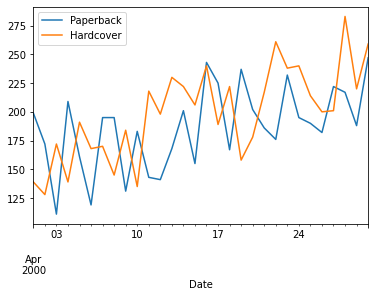

In [8]:
#plot over time
books.plot();

<AxesSubplot: xlabel='Hardcover', ylabel='Paperback'>

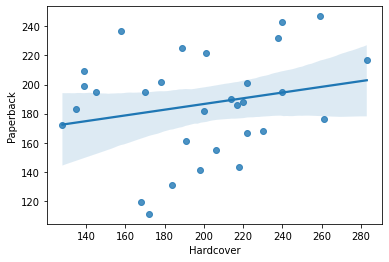

In [9]:
#regplot
sns.regplot(data = books, x = 'Hardcover', y = 'Paperback')

**PROBLEM**

Use the code below to read in the `us-retail-sales.csv` data, this time creating a datetime index from the `Month` column.

Use the `.resample()` method to determine the monthly average for Building Materials.  Create a line plot of this data using either `seaborn` or `matplotlib`. 

In [10]:
sales = pd.read_csv('data/us-retail-sales.csv', parse_dates=True, index_col = 0)

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1992-01-01 to 2019-12-01
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Clothing            336 non-null    int64
 1   Appliances          336 non-null    int64
 2   FoodAndBeverage     336 non-null    int64
 3   Automobiles         336 non-null    int64
 4   GeneralMerchandise  336 non-null    int64
 5   BuildingMaterials   336 non-null    int64
dtypes: int64(6)
memory usage: 18.4 KB


In [12]:
#resample and plot
sales.head(2)

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023


In [18]:
sales.resample('Y').first().head(2)

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-12-31,6938,3657,29589,26788,14996,8964
1993-12-31,7502,4105,30039,29054,16097,8947


In [19]:
sales.head(3)

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,8475,3669,29682,31684,17984,10608


**`pandas`**

`pd.melt`

```
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.
```

In [22]:
#create a melted dataframe of Building Materials and Clothing
melted_sales = pd.melt(sales[['BuildingMaterials', 'Clothing']], ignore_index = False )

In [24]:
#add a month column
melted_sales['month'] = melted_sales.index.month
melted_sales.head(2)

,variable,value,month
Month,,,
1992-01-01,BuildingMaterials,8964,1
1992-02-01,BuildingMaterials,9023,2


<AxesSubplot: xlabel='month', ylabel='value'>

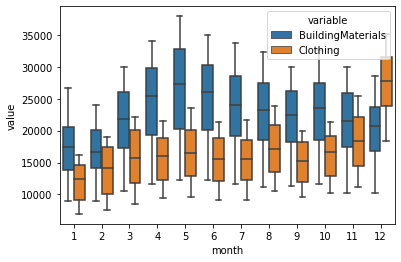

In [25]:
#make a boxplot
sns.boxplot(data = melted_sales, x = 'month', y = 'value', hue = 'variable')

### Reading in Data from HTML Tables

Now, we turn to one more approach in accessing data. As we've seen, you may have `json` or `csv` when querying a data API. Alternatively, you may receive HTML data where information is contained in tags.  Below, we examine some basic html tags and their effects.

```html
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
```

In [26]:
html = '''
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
'''

In [27]:
from IPython.display import HTML

In [28]:
HTML(html)

Album,Rating
Pink Panther,10


### Making a request of a url

Let's begin with some basketball information from basketball-reference.com:

- https://www.basketball-reference.com/wnba

The tables on the page will be picked up (hopefully!) by the `read_html` function in pandas.

In [29]:
#visit the url below
url = 'https://www.basketball-reference.com/wnba'

In [30]:
#assign the results as data
#read_html
data = pd.read_html(url)

In [31]:
#what kind of object is data?
type(data)

list

In [35]:
#first element?
data[1]

,Eastern Conference,W,L,W/L%,GB
0,Chicago Sky*,26,10,0.722,—
1,Connecticut Sun*,25,11,0.694,1.0
2,Washington Mystics*,22,14,0.611,4.0
3,New York Liberty*,16,20,0.444,10.0
4,Atlanta Dream,14,22,0.389,12.0
5,Indiana Fever,5,31,0.139,21.0


In [36]:
#examine information
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Western Conference  6 non-null      object 
 1   W                   6 non-null      int64  
 2   L                   6 non-null      int64  
 3   W/L%                6 non-null      float64
 4   GB                  6 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 368.0+ bytes


In [ ]:
#last dataframe?


In [ ]:
#plot?


**Example 2**

List of best selling albums from Wikipedia.

- https://en.wikipedia.org/wiki/List_of_best-selling_albums

In [78]:
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_albums'

In [79]:
#read in the tables
albums = pd.read_html(url)

In [80]:
#how many tables?
len(albums)

12

In [81]:
#look at the fourth table
fourth_table = albums[3]
fourth_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Artist                                            47 non-null     object
 1   Album                                             47 non-null     object
 2   Released                                          47 non-null     int64 
 3   Genre                                             47 non-null     object
 4   Total certified copies (from available markets)*  47 non-null     object
 5   Claimed sales*                                    47 non-null     object
 6   Ref(s)                                            47 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.7+ KB


In [82]:
#try to convert sales to float
fourth_table['Claimed sales*'].astype('float')

ValueError: could not convert string to float: '20[disputed – discuss]'

In [ ]:
#replace and coerce as float
fourth_table['Claimed sales*'] = fourth_table['Claimed sales*'].replace({'20[disputed – discuss]': 20}).astype('float')

In [89]:
#alternative with string method
#fourth_table['Claimed sales*'].str.replace('[disputed – discuss]', '', regex = False)

### Scraping the Web for Data

Sometimes the data is not formatted as an `html` table or `pd.read_html` simply doesn't work.  In these situations you can use the `bs4` library and its `BeautifulSoup` object to parse HTML tags and extract information.  First, make sure you have the library installed and can import it below.

In [ ]:
# pip install -U bs4

In [51]:
from bs4 import BeautifulSoup
import requests

In [52]:
sample_html = '''
<h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class = "score">2</i></p>
<p class = "good">This album was great. <strong>Score</strong>: <i class = "score">8</i></p>
'''

In [53]:
# create a soup object
soup = BeautifulSoup(sample_html)

In [54]:
# examine the soup
soup

<html><body><h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>
<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>
</body></html>

In [55]:
# find the <p> tags
soup.find('p')

<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>

In [56]:
# find the i tag
soup.find('i')

<i class="score">2</i>

In [57]:
# find all the i tags
soup.find_all('i')

[<i class="score">2</i>, <i class="score">8</i>]

In [59]:
# find all good paragraphs
soup.find_all('p', {'class': 'good'})

[<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>]

#### Extracting Data from a URL

1. Make a request.
2. Turn the request into soup!

In [60]:
url = 'https://pitchfork.com/reviews/albums/'

In [61]:
#make a request
r = requests.get(url)

In [62]:
#examine the text
r.text[:200]

'<!DOCTYPE html><html lang="en"><head><title data-react-helmet="true">New Albums &amp; Music Reviews | Pitchfork</title><meta data-react-helmet="true" name="viewport" content="width=device-width, initi'

In [63]:
#turn it into soup!
soup = BeautifulSoup(r.text, 'html.parser')

### Using Inspect

You can inspect an items HTML code by right clicking on the item of interest and selecting **inspect**.  Here, you will see the html tags that surround the object of interest.  

For example, when writing this lesson the most recent album review on pitchfork was *Kid Cudi: Entergalactic*.  Right clicking on the image of the album cover and choosing inspect showed:

![](images/cudi.png)

In [64]:
#find the img tag
soup.find('img')

<img alt="Shygirl: Nymph" src="https://media.pitchfork.com/photos/627a992b19ba7092f7683375/1:1/w_160/Shygirl-Nymph.jpg"/>

In [65]:
#find all img tags
soup.find_all('img')

[<img alt="Shygirl: Nymph" src="https://media.pitchfork.com/photos/627a992b19ba7092f7683375/1:1/w_160/Shygirl-Nymph.jpg"/>,
 <img alt="YG: I Got Issues" src="https://media.pitchfork.com/photos/633b0f38032f2cf292ce7259/1:1/w_160/YG%20-%20I%20Got%20Issues.jpeg"/>,
 <img alt="Pretty Sick: Makes Me Sick Makes Me Smile" src="https://media.pitchfork.com/photos/633d91a32c43a8ae582570b2/1:1/w_160/Pretty%20Sick%20-%20Makes%20Me%20Sick%20Makes%20Me%20Smile.jpeg"/>,
 <img alt="Shannen Moser: The Sun Still Seems to Move" src="https://media.pitchfork.com/photos/63349b4bc10eb893fc900e9f/1:1/w_160/Shannen-Moser.jpg"/>,
 <img alt="Kid Cudi: Entergalactic" src="https://media.pitchfork.com/photos/633b0dbe14701c9719859eec/1:1/w_160/Kid%20Cudi%20-%20Entergalactic.jpeg"/>,
 <img alt="Freddie Gibbs: $oul $old $eparately" src="https://media.pitchfork.com/photos/631f7eab800c1a0f8721b43e/1:1/w_160/Freddie-Gibbs.jpg"/>,
 <img alt="Sumerlands: Dreamkiller" src="https://media.pitchfork.com/photos/62f40a927e04458d

In [72]:
#extract src
im1 = soup.find_all('img')[0]
im1.attrs

{'src': 'https://media.pitchfork.com/photos/627a992b19ba7092f7683375/1:1/w_160/Shygirl-Nymph.jpg',
 'alt': 'Shygirl: Nymph'}

In [73]:
im1.attrs['src']

'https://media.pitchfork.com/photos/627a992b19ba7092f7683375/1:1/w_160/Shygirl-Nymph.jpg'

In [75]:
# extract the genre tags
soup.find('a', {'class': 'genre-list__link'})

<a class="genre-list__link" href="/reviews/albums/?genre=electronic">Electronic</a>

In [76]:
# extract the text from the genres
soup.find('a', {'class': 'genre-list__link'}).text

'Electronic'

**PROBLEM**

Use the url below to the npr book review site.  Make a request, turn this into a soup object, and use the inspect tool to locate the title of each article on the page.  

In [ ]:
url = 'https://www.npr.org/sections/book-reviews/'

#### Summary

There are many ways you may get data -- a file that somebody shares with you, data obtained through an API, data obtained through scraping and crawling websites, and even more like a database that you connect to.  Now that you've got some basics with both data accession, cleaning, munging, and visualizing -- it's time to explore a dataset and ask your own questions.